In [3]:
import numpy as np
import pandas as pd

In [4]:
# Se importan los datos para ambas bases de datos
diagnose_df = pd.read_excel("datos/Datos_diagnosticos.xlsx") # Datos de diagnostico de pacientes
process_df = pd.read_csv('datos/grouped_procedures.csv', delimiter=",") # Datos de procedimientos

process_df = process_df.rename({"Case": "CASE"}, axis="columns")
process_df = process_df.rename({"LOS (days)": "LOS"}, axis="columns")

process_df

,CASE,Procedure,LOS
0,13872110,0A,3
1,14035188,0A,3
2,14085514,0A,1
3,14111667,0A,3
4,14111831,0A,2
...,...,...,...
11946,15056499,4-5,1
11947,15056507,4,1
11948,15056517,4,1
11949,15057405,0A,1


In [5]:
# Guardamos el diagnostico de acuerdo a su primera letra
diagnose = [d[0] for d in diagnose_df["Diagnosis"]]

diagnose_df["Diagnosis"] = diagnose

In [6]:
# Se realiza un join entre ambas bases de datos
data = pd.merge(process_df, diagnose_df, on="CASE")

In [7]:
print(len(data["CASE"]))
data

110060


,CASE,Procedure,LOS,Seq,PrincSec,Diagnosis
0,13872110,0A,3,1,P,E
1,13872110,0A,3,1,S,Z
2,13872110,0A,3,1,S,D
3,14035188,0A,3,1,P,J
4,14035188,0A,3,1,S,I
...,...,...,...,...,...,...
110055,15057405,0A,1,2,S,D
110056,15057706,1,0,1,P,O
110057,15057706,1,0,2,P,O
110058,15057706,1,0,2,S,Z


In [8]:
# Filtramos los datos solo para el diagnostico principal
data = data[data['PrincSec'] == 'P']

In [9]:
data

,CASE,Procedure,LOS,Seq,PrincSec,Diagnosis
0,13872110,0A,3,1,P,E
3,14035188,0A,3,1,P,J
8,14085514,0A,1,1,P,S
11,14111667,0A,3,1,P,E
14,14111831,0A,2,1,P,E
...,...,...,...,...,...,...
110050,15056517,4,1,1,P,G
110052,15057405,0A,1,1,P,U
110053,15057405,0A,1,2,P,N
110056,15057706,1,0,1,P,O


## El archivo categorizacion_filtro.ipynb genera una base de datos que implementa todo el codigo pasado de este cuaderno, ademas de filtrar por cantidad de procedimientos

In [10]:
# Aca importo los datos de la mica
data = pd.read_csv('data_redes.csv', delimiter=",")

In [11]:
print(len(data))
data

15949


,CASE,Procedure,LOS,Seq,PrincSec,Diagnosis
0,13872110,0V,3,1,P,E
1,14035188,0V,3,1,P,J
2,14085514,0T,1,1,P,S
3,14111667,0V,3,1,P,E
4,14111831,0U,2,1,P,E
...,...,...,...,...,...,...
15944,15056507,4,1,1,P,G
15945,15056517,4,1,1,P,G
15946,15057405,0T,1,1,P,U
15947,15057405,0T,1,2,P,N


In [12]:
types_of_diagnosis = list(data['Diagnosis'].unique())

print(f'Cantidad de diagnosticos diferentes: {len(types_of_diagnosis)}')
print(types_of_diagnosis)

Cantidad de diagnosticos diferentes: 22
['E', 'J', 'S', 'Z', 'K', 'D', 'M', 'I', 'U', 'C', 'A', 'L', 'N', 'O', 'G', 'F', 'T', 'Q', 'H', 'R', 'P', 'B']


In [13]:
# Funcion que formatea los datos en un string unido por guiones
def formatter(lista):
    return "-".join(lista)

# Obtenemos una lista de los valores de la columna Case
cases = sorted(list(data['CASE'].values))

# Eliminamos los repetidos
patients = list()
for case in cases:
    if case not in patients:
        patients.append(case)

In [14]:
# Para cada paciente, agrupamos sus diagnosticos
filas = list()

for i in range(len(patients)):
    # Se filtra la base de datos solo con los datos para el paciente i
    filtro = data[data['CASE'] == patients[i]]
    
    # Se obtienen sus diagnosticos
    diagnosticos = set(filtro['Diagnosis'].values)
    diagnosticos = tuple(sorted(diagnosticos))
    
    procedures = filtro['Procedure'].values[0]
    
    case = patients[i]
    los = max(list(filtro['LOS'].values))
    row = (case, diagnosticos, procedures, los)
    
    filas.append(row)

In [15]:
new_df = pd.DataFrame(filas, columns=["Case", "Diagnosis", "Procedure", "LOS"])

In [16]:
new_df['Procedure'].unique()

array(['0V', '0T', '0U', '0W', '0Z-3', '0Z', '0Z-3-4-5-B', '1',
       '0W-1-3-4', '0V-1', '0V-1-3-4', '0V-1-3', '1-3-4', '0U-1-3-4',
       '1-3', '0V-1-4', '0U-1-3', '1-4', '0U-1', '0U-1-4', '0W-1',
       '0Z-3-5', '5-B', '3-4', '0Y', '0U-B', '0V-5', '0Y-5', '0Y-3',
       '0W-1-4', '4', '0Z-5', '0T-3-4-B', '0V-B', '0W-1-3', 'B', '0Y-5-B',
       '0T-4-B', '0V-3', '0Y-B', '0W-3-5', '0Z-B', '0Z-3-5-B', '0T-4',
       '0Z-3-B', '0T-3-4', '0T-1-3-4', '4-5-B', '4-B', '0W-3', '0Z-4-5-B',
       '0W-5-B', '3', '0W-5', '0V-5-B', '0U-3', '3-5-B', '3-5',
       '0T-4-5-B', '0Z-5-B', '5', '0Y-3-5', '0T-B', '3-4-B', '0W-B',
       '0Y-3-4-5', '0Y-4-5-B', '0Z-3-4-B', '0Y-4-B', '0Y-3-B', '0Y-1-3-4',
       '0W-4-B', '0Y-4', '0V-4-B', '0V-4-5-B', '0Y-4-5', '4-5', '0U-4-B',
       '0U-5', '0T-3', '0V-4', '0T-5', '0W-3-4-5-B', '0U-4', '0Z-4-B',
       '0W-3-B', '0U-3-4-5-B', '0U-3-4', '0Y-3-5-B', '0V-3-5', '0W-3-5-B',
       '0U-3-4-5', '0Y-3-4-5-B', '0T-3-5', '0W-4-5-B', '0Z-3-4', '0Y-3-4',
      

In [17]:
new_df

,Case,Diagnosis,Procedure,LOS
0,13872110,"(E,)",0V,3
1,14035188,"(J,)",0V,3
2,14085514,"(S,)",0T,1
3,14111667,"(E,)",0V,3
4,14111831,"(E,)",0U,2
...,...,...,...,...
11521,15056499,"(G,)",4-5,1
11522,15056507,"(G,)",4,1
11523,15056517,"(G,)",4,1
11524,15057405,"(N, U)",0T,1


In [18]:
len(new_df['Procedure'].unique())

114

In [19]:
# Se define una funcion para obtener el conjunto potencia de los diagnosticos

def powerSet(lista, df):
    
    conjunto = list()
    is_contained = True
    for diag in df['Diagnosis']:
        for c in diag:
            if c not in lista:
                is_contained = False
        if is_contained:
            conjunto.append(diag)
        is_contained = True
    conjunto = list(set(conjunto))
    return conjunto

In [20]:
# Se define una funcion que retorna un arreglo con el intervalo correspondiente para cada dato
def getInterval(dato, intervalos):
    for inter in intervalos:
        if inter[0] <= dato <= inter[1]:
            return inter
        
def makeIntervals(bins):
    intervals = list()
    
    for i in range(len(bins)-1):
        intervals.append((bins[i], bins[i+1]))
    return intervals

In [21]:
# Se filtra la base de datos para esto, ya que cuando se hagan las particiones de LOS solo existirá un dato con una clase
# única, que será el intervalo (190.75, 224.0)
new_df = new_df[new_df['LOS'] < 190]

In [22]:
new_df

,Case,Diagnosis,Procedure,LOS
0,13872110,"(E,)",0V,3
1,14035188,"(J,)",0V,3
2,14085514,"(S,)",0T,1
3,14111667,"(E,)",0V,3
4,14111831,"(E,)",0U,2
...,...,...,...,...
11521,15056499,"(G,)",4-5,1
11522,15056507,"(G,)",4,1
11523,15056517,"(G,)",4,1
11524,15057405,"(N, U)",0T,1


In [23]:
# Discretizamos los intervalos de LOS
from sklearn.preprocessing import KBinsDiscretizer

normLOS = np.asarray(new_df['LOS'].astype(float)).reshape(-1, 1)
model = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='kmeans')

# Se fitean los datos de acuerdo al modelo
print(model.fit(normLOS))

# Intervalos
bins = model.bin_edges_[0]

# Transformamos los bins a intervalos
bins = makeIntervals(bins)

binned_LOS = [getInterval(dato, bins) for dato in new_df['LOS']]

KBinsDiscretizer(encode='ordinal', n_bins=12, strategy='kmeans')


In [24]:
new_df.insert(4, 'binnedLOS', binned_LOS)

In [25]:
new_df.groupby(['binnedLOS']).count()

,Case,Diagnosis,Procedure,LOS
binnedLOS,,,,
"(0.0, 5.053121516936446)",8790,8790,8790,8790
"(5.053121516936446, 12.141026503753984)",1479,1479,1479,1479
"(12.141026503753984, 21.28589439786129)",633,633,633,633
"(21.28589439786129, 32.089636035105855)",312,312,312,312
"(32.089636035105855, 44.24639921574537)",149,149,149,149
"(44.24639921574537, 58.30593900481537)",89,89,89,89
"(58.30593900481537, 75.1436090225564)",35,35,35,35
"(75.1436090225564, 93.40789473684211)",19,19,19,19
"(93.40789473684211, 110.25)",10,10,10,10


### Definición del set de _training_ y set de _test_

Mediante *Cross Validation*, se obtendrá un set de training y uno de test para el modelo clasificador.

Por ahora esta esto. ***Incluir cross validation aquí***

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
# Separamos las features
target = new_df['binnedLOS']

features = pd.DataFrame({'Diagnosis': new_df['Diagnosis'], 'Procedure': new_df['Procedure']})

# Realizamos la partición estratificada; consideramos la proporcion 80-20 entre
# datos de entrenamiento y datos de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                    random_state=1, stratify=target)

---
## Entrenamiento del modelo

### Probabilidades a priori

En esta sección se procederá a calcular las probabilidades a priori de _Naive Bayes_. 

In [28]:
# Probabilidad a priori de tener cada diagnóstico

# Cambiamos el nombre a uno mas descriptivo
train_set = X_train.copy()

In [29]:
# Juntamos las features del set de entrenamiento
train_set.insert(2, 'binnedLOS', y_train)

In [30]:
train_set

,Diagnosis,Procedure,binnedLOS
2086,"(I,)",5-B,"(0.0, 5.053121516936446)"
6361,"(C, U)",0Y-3,"(21.28589439786129, 32.089636035105855)"
3805,"(D,)",0W,"(5.053121516936446, 12.141026503753984)"
2900,"(K, U)",0V-B,"(0.0, 5.053121516936446)"
2771,"(O,)",1,"(0.0, 5.053121516936446)"
...,...,...,...
8960,"(N,)",0U,"(0.0, 5.053121516936446)"
11369,"(N, U)",3,"(0.0, 5.053121516936446)"
1151,"(I, U)",0V,"(0.0, 5.053121516936446)"
11012,"(R,)",0V,"(0.0, 5.053121516936446)"


In [31]:
# Probabilidad a priori de que un paciente tenga o no cada diagnostico
probs_diagnosis = dict()

total = len(train_set['Diagnosis'])

for diag in types_of_diagnosis:
    frec = 0
    
    # Iteramos por las filas de nuestro training set
    for case in train_set['Diagnosis']:
        if diag in case:
            frec += 1
    # Se guarda la probabilidad en el diccionario
    probs_diagnosis[diag] = frec/total

In [32]:
probs_diagnosis

{'E': 0.047505422993492405,
 'J': 0.06475054229934923,
 'S': 0.07039045553145336,
 'Z': 0.0938177874186551,
 'K': 0.12039045553145336,
 'D': 0.033188720173535795,
 'M': 0.10911062906724511,
 'I': 0.14913232104121474,
 'U': 0.28557483731019523,
 'C': 0.061605206073752715,
 'A': 0.0158351409978308,
 'L': 0.010845986984815618,
 'N': 0.05596529284164859,
 'O': 0.09793926247288504,
 'G': 0.08741865509761389,
 'F': 0.0039045553145336228,
 'T': 0.03297180043383948,
 'Q': 0.004989154013015184,
 'H': 0.005639913232104121,
 'R': 0.028091106290672452,
 'P': 0.004338394793926247,
 'B': 0.003145336225596529}

### Orden de los procedimientos según frecuencia

In [33]:
# Ahora definimos el orden de la cadena de procedimientos, esto se hará en orden decreciente
# según la frecuencia de cada procedimiento
train_set['set_procedimientos'] = [set(proc.split('-')) for proc in train_set['Procedure']]

In [34]:
# Obtenemos un set con todos los procedimientos en cuestion
set_pronosticos_posibles = set.union(*train_set['set_procedimientos'].tolist())

# Iteramos sobre cada pronostico y sacamos la cantidad de casos con ese procedimiento
cantidades_procedimientos = dict()
for proc in set_pronosticos_posibles:
    cantidades_procedimientos[proc] =  train_set[train_set['Procedure'].str.contains(proc)]['Procedure'].count()
        
# Definimos el orden
orden = sorted(cantidades_procedimientos.items(), key = lambda kv:(kv[1], kv[0]))

orden_final = list()
for i in reversed(orden):
    orden_final.append(i[0])
orden_final

['0T', '0V', '4', '3', '0U', 'B', '0W', '1', '5', '0Y', '0Z']

#### Ahora ya con el orden definido, sacamos las probabilidades de que este el procedimiento 0T, dado un grupo de diagnósticos

Nota: el orden es: 0T - 0V - 4 - 3 - 0U - B - 0W - 1 - 5 - 0Y - 0Z

In [35]:
# Se calculan las probabilidades de que este o no el procedimiento 0T, dado un conjunto de diagnosticos
diagnoses = powerSet(list(probs_diagnosis.keys()), train_set)

probs_OT_diagnoses = {'0T': dict(), '-0T': dict()}

total = len(train_set)

for comb in diagnoses:
    filtered_by_comb = train_set[train_set['Diagnosis'] == comb]
    total = len(filtered_by_comb)
    if total > 0:
        OT_total = len(filtered_by_comb[filtered_by_comb['Procedure'].str.contains("0T")])
        prob = OT_total / total
        # Se guarda la probabilidad y el complemento
        probs_OT_diagnoses['0T'][comb] = prob
        probs_OT_diagnoses['-0T'][comb] = 1 - prob

### Probabilidades en la cadena de procedimientos

Se calculan probabilidades de la forma *P(Oi+1 | Oi)* para la cadena de procedimientos.

In [36]:
# La lista a recorrer es orden_final
lista_dict_con_probabilidades = list()


for indice in range(1, len(orden_final)):
    
    # Guardaremos en un diccionario las 4 probabilidades que buscamos
    
    # Creamos variables para que el codigo sea más legible
    procedimiento = orden_final[indice]
    padre = orden_final[indice - 1]
    
    # Diccionario de cada procedimiento
    probs_del_procedimiento = {
                        procedimiento + "|" + padre : None,
                        "-" + procedimiento + "|" + padre : None,
                        procedimiento + "|" + "-" + padre : None,
                        "-" + procedimiento + "|" + "-" + padre : None
    }
    
    # Sacamos la cantidad de entradas con el padre y sin el padre
    db_con_padre = train_set[train_set['Procedure'].str.contains(padre)]
    db_sin_padre = train_set[~train_set['Procedure'].str.contains(padre)]
    
    ## Sacamos las probs dado que el padre si esta
    total_con_padre = len(db_con_padre)
    prob_esta_con_papa = len(db_con_padre[db_con_padre['Procedure'].str.contains(procedimiento)])/total_con_padre
    
    # Agregamos los valores
    probs_del_procedimiento[procedimiento + "|" + padre] = prob_esta_con_papa
    probs_del_procedimiento["-" + procedimiento + "|" + padre] = 1 - prob_esta_con_papa
    
    
    ## Sacamos las probs dado que el padre no esta
    total_sin_padre = len(db_sin_padre)
    prob_esta_sin_papa = len(db_sin_padre[db_sin_padre['Procedure'].str.contains(procedimiento)])/total_sin_padre
    
    # Agregamos los valores
    probs_del_procedimiento[procedimiento + "|" + "-" + padre] = prob_esta_sin_papa
    probs_del_procedimiento["-" + procedimiento + "|" + "-" + padre] = 1 - prob_esta_sin_papa
    
    # guardamos el diccionario en la lista con toda la info
    lista_dict_con_probabilidades.append(probs_del_procedimiento)

    
print(lista_dict_con_probabilidades)

[{'0V|0T': 0.0, '-0V|0T': 1.0, '0V|-0T': 0.2610892756878158, '-0V|-0T': 0.7389107243121842}, {'4|0V': 0.08118279569892473, '-4|0V': 0.9188172043010753, '4|-0V': 0.21304347826086956, '-4|-0V': 0.7869565217391304}, {'3|4': 0.11925538103548575, '-3|4': 0.8807446189645143, '3|-4': 0.18797493667510998, '-3|-4': 0.81202506332489}, {'0U|3': 0.04643962848297214, '-0U|3': 0.9535603715170279, '0U|-3': 0.1467455621301775, '-0U|-3': 0.8532544378698225}, {'B|0U': 0.05877413937867338, '-B|0U': 0.9412258606213266, 'B|-0U': 0.12903225806451613, '-B|-0U': 0.8709677419354839}, {'0W|B': 0.06238698010849909, '-0W|B': 0.9376130198915009, '0W|-B': 0.0964998767562238, '-0W|-B': 0.9035001232437762}, {'1|0W': 0.015258215962441314, '-1|0W': 0.9847417840375586, '1|-0W': 0.0987093690248566, '-1|-0W': 0.9012906309751434}, {'5|1': 0.0, '-5|1': 1.0, '5|-1': 0.08507338026488485, '-5|-1': 0.9149266197351151}, {'0Y|5': 0.16129032258064516, '-0Y|5': 0.8387096774193549, '0Y|-5': 0.06723874456330081, '-0Y|-5': 0.932761255

### Probabilidades de estar en cada intervalo de LOS, dado el último procedimiento

Se calculan las probabilidades de estar en cada uno de los 5 intervalos de LOS, dado o no el procedimiento 0Z.

In [37]:
# Se obtienen las probabilidades de cada intervalo, dado o no el procedimiento OZ (es el ultimo de la cadena)
probs_LOS_OZ = {'0Z': dict(), '-0Z': dict()}

OZ_filter = train_set[train_set['Procedure'].str.contains("0Z")]

# Se obtienen las filas con procedimientos que no contienen al procedimiento OZ 
notOZ_filter = train_set[~train_set['Procedure'].str.contains("0Z")]
total_OZ = len(OZ_filter)
total_notOZ = len(notOZ_filter)

# Probabilidades dado que se realizo OZ
for _bin in bins:
    bin_total = len(OZ_filter[OZ_filter['binnedLOS'] == _bin])
    
    # Prob de tener intervalo _bin dado OZ
    prob = bin_total / total_OZ
    
    # Se guardan las probabilidades
    probs_LOS_OZ['0Z'][_bin] = prob
    
# Probabilidades dado que no se realizo OZ
for _bin in bins:
    bin_total = len(notOZ_filter[notOZ_filter['binnedLOS'] == _bin])
    
    # Prob de tener intervalo _bin dado OZ
    prob = bin_total / total_notOZ
    
    # Se guardan las probabilidades
    probs_LOS_OZ['-0Z'][_bin] = prob
    


---
## Testeo del modelo

Debido a que ya se encontraron las probabilidades a priori del grafo propuesto, estas son las que determinan finalmente el entrenamiento del modelo. A continuación se definen las funciones que permiten encontrar una predicción, dadas las probabilidades encontradas de la base de entrenamiento.

In [38]:
# Se agrupan todas las probabilidades a priori encontradas
probs_data = {'diagnosis': probs_diagnosis, 
              '0T|diagnosis': probs_OT_diagnoses, 
              'child|father': lista_dict_con_probabilidades, 
              'LOS|0Z': probs_LOS_OZ}

In [39]:
def multiplyItems(lista):
    number = 1
    for elem in lista:
        number *= elem
    return number

In [191]:
def predictLOSBin(diagnosis, procedures, bins, probs_data, interval_prob):
    prior_probs = list()
    # Se obtienen las probabilidades a priori de cada diagnostico
    for d in diagnosis:
        if d in probs_data['diagnosis'].keys():
            prior_probs.append(probs_data['diagnosis'][d])
        else:
            return f"Diagnóstico {d} no encontrado"
    # Probabilidades a priori del procedimiento, dado los diagnosticos
    _procedures = '-'.join(procedures)
    _diagnosis = tuple(sorted(diagnosis))
    if '0T' in _procedures:
        probs_OT = probs_data['0T|diagnosis']['0T']
    else:
        probs_OT = probs_data['0T|diagnosis']['-0T']
        
    # Si la combinacion de diagnosticos no existe se retorna
    if _diagnosis not in probs_OT.keys():
        return f"Para los diagnósticos {_diagnosis} no hay una probabilidad asociada"
    prior_probs.append(probs_OT[_diagnosis])
    
    # Acá se deben obtener las probabilidades de la cadena de procedimientos
    probs_chain = probs_data['child|father']
    for k in range(len(probs_chain)):
        child, father = list(probs_chain[k].keys())[0].split('|')
        prob = None
        if child in _procedures and father in _procedures:
            prob = list(probs_chain[k].values())[0]
        elif child not in _procedures and father in _procedures:
            prob = list(probs_chain[k].values())[1]
        elif child in _procedures and father not in _procedures:
            prob = list(probs_chain[k].values())[2]
        elif child not in _procedures and father not in _procedures:
            prob = list(probs_chain[k].values())[3]
        prior_probs.append(prob)
    
    # Se obtienen las probabilidad de cada LOS dado o no el 0Z
    if '0Z' in _procedures:
        probs_LOS = probs_data['LOS|0Z']['0Z']
    else:
        probs_LOS = probs_data['LOS|0Z']['-0Z']
    
    # Se obtienen las probabilidades para cada intervalo de LOS
    probs = dict()
    path = multiplyItems(prior_probs)
    for b, p in probs_LOS.items():
        probs[b] = p * path
        
    # Se retorna el intervalo con mayor probabilidad
    best_prob = max(probs.values())
    intervalo = None
    for b, p in probs.items():
        if p == best_prob:
            intervalo = b
            break
            
    # Se retorna la probabilidad de caer en el intervalo especificado
    prob_interval = probs[interval_prob]
    return intervalo, prob_interval
    

### Uso del set de test para encontrar la predicción

In [221]:
def getPrediction(df, bins, probs_data, interval):
    diagnosis = [d for d in df['Diagnosis']]
    procedure = [p.split('-') for p in df['Procedure']]
    
    # Se obtienen las probabilidades de caer en cierto intervalo
    probs_interval = list()
    
    target_prediction = list()
    
    for i in range(len(df)):
        try:
            _bin, prob = predictLOSBin(diagnosis[i], procedure[i], bins, probs_data, interval)
            target_prediction.append(_bin)
            probs_interval.append(prob)
        except ValueError:
            _bin = predictLOSBin(diagnosis[i], procedure[i], bins, probs_data, interval)
            target_prediction.append(_bin)
        
    
    return target_prediction, probs_interval


In [309]:
# Se prueba la predicción con el dataframe X_test
# Se setea el intervalo a plotear en la curva ROC
n_interval = 0

prediction, probs_interval = getPrediction(X_test, bins, probs_data, bins[n_interval])   # Aca se testea cada entrada de X_test

'''
Se puede descomentar lo siguiente para probar la prediccion en un paciente cualquiera
'''
#diagnosticos = ['E', 'Z']
#procedures = ['0T', '0A']

#predictLOSBin(diagnosticos, procedures, bins, probs_data)

'\nSe puede descomentar lo siguiente para probar la prediccion en un paciente cualquiera\n'

In [310]:
y_test_NB = list(y_test)

desempeño = list()
for i in range(len(y_test_NB)):
    if 'no' not in prediction[i]:
        if y_test_NB[i] == prediction[i]:
            desempeño.append(1)
        else:
            desempeño.append(0)
    # Aca se marcan todos los casos en que el modelo no supo predecir debido a que no existia una 
    # probabilidad asociada al conjunto de diagnosticos, por lo que se evaluara el modelo en base 
    # a los datos que sí predijo y los datos que existen en la fila correspondiente
    else:
        y_test_NB[i] = None
        
aciertos = sum(desempeño)
total = len(desempeño)

porcentaje = round((aciertos/total) * 100, 2)

print(f'Porcentaje de aciertos: {porcentaje} %')

Porcentaje de aciertos: 78.54 %


Vemos que nuestro modelo predice el intervalo correcto en un 78.54 % de los casos. Ahora procederemos a comparar los resultados con otros modelos clasificadores.

# Random Forest para clasificar los datos

Ahora que tenemos la base de datos con variables categóricas (la variable _LOS_ fue discretizada mediante *kMeans*), se procederá a utilizar el modelo de aprendizaje supervisado *RANDOM FOREST*, el cual permite establecer predicciones del intervalo en el que estará el LOS, posterior a que se le ha realizado un entrenamiento. 

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, \
                            classification_report
from sklearn import preprocessing

In [312]:
# Para que el modelo funcione, se presentan los datos como si fueran numeros enteros
le = preprocessing.LabelEncoder()

categories = ["Diagnosis", "Procedure"]
dictCategories = {}

for cat in categories:
    
    le.fit(features[cat])
    print(f"Categoria: {cat} => {le.classes_}")
    print(f"Transformacion: {[i for i in range(len(le.classes_))]}")
    print()
    
    dictCategories[cat] = le.transform(features[cat])

# Se muestran los datos categoricos representados como enteros
print()
print("Datos categoricos como enteros:")
print(dictCategories)

features_ = pd.DataFrame(dictCategories)

Categoria: Diagnosis => [('A',) ('A', 'B', 'K', 'U') ('A', 'C', 'K', 'U') ('A', 'C', 'U')
 ('A', 'D') ('A', 'D', 'I', 'J', 'U', 'Z') ('A', 'E') ('A', 'E', 'K', 'U')
 ('A', 'E', 'U') ('A', 'F', 'K', 'U') ('A', 'F', 'T', 'U') ('A', 'F', 'U')
 ('A', 'G', 'I', 'U') ('A', 'G', 'U') ('A', 'G', 'Z')
 ('A', 'I', 'J', 'U', 'Z') ('A', 'I', 'K', 'U', 'Z') ('A', 'I', 'M', 'U')
 ('A', 'I', 'U') ('A', 'I', 'U', 'Z') ('A', 'J', 'T', 'U') ('A', 'J', 'U')
 ('A', 'J', 'Z') ('A', 'K') ('A', 'K', 'U') ('A', 'K', 'U', 'Z')
 ('A', 'L', 'U') ('A', 'M', 'U') ('A', 'M', 'Z') ('A', 'N', 'U')
 ('A', 'N', 'U', 'Z') ('A', 'R', 'T', 'U') ('A', 'R', 'U') ('A', 'S', 'U')
 ('A', 'T') ('A', 'T', 'U') ('A', 'U') ('A', 'U', 'Z') ('A', 'Z') ('B',)
 ('B', 'C', 'E', 'Z') ('B', 'H', 'U') ('B', 'K', 'U') ('B', 'N', 'U', 'Z')
 ('B', 'U') ('C',) ('C', 'D') ('C', 'D', 'J', 'U') ('C', 'D', 'U')
 ('C', 'D', 'Z') ('C', 'F', 'R', 'U', 'Z') ('C', 'F', 'U') ('C', 'G')
 ('C', 'G', 'J', 'U') ('C', 'G', 'U') ('C', 'G', 'U', 'Z') ('C', 'G

In [313]:
# Se obtienen los intervalos de LOS 'categorizados' por numeros
catLOS = model.transform(normLOS)

target_ = [los[0] for los in catLOS]

### Acá se debe hacer _cross validation_ también.

In [314]:
# Realizamos la partición estratificada; consideramos la proporcion 80-20 entre
# datos de entrenamiento y datos de test
X_train_, X_test_, y_train_, y_test_ = train_test_split(features_, target_, test_size=0.2,
                                                    random_state=1, stratify=target)

In [315]:
# Funcion que entrega una prediccion para los datos de prueba 
def getOtherPrediction(X_test, trained, n_bin):
    y_pred = trained.predict(X_test)
    y_pred_proba = trained.predict_proba(X_test)[:, n_bin] # probabilidades de predecir el tercer intervalo
    return y_pred, y_pred_proba

### Modelo Random Forest

In [316]:
# Definimos una función que permite entrenar los datos con el RandomForest

def fitRandomForest(X, y, seed=0):
    '''
    n_estimators: numero de arboles de clasificacion en el algoritmo
    max_depth: maxima profundidad en el árbol
    class_weight: pesos asignados a cada clase a predecir
    '''
    clf = RandomForestClassifier(n_estimators=75, max_depth=10, 
                                 class_weight='balanced' , random_state=seed)
    trained = clf.fit(X, y)
    
    return trained

### Decision Tree

Se realiza lo mismo que para el _Random Forest_.

In [317]:
def fitDecisionTree(X, y, seed=0):
    
    clf = DecisionTreeClassifier(criterion="entropy",
                                max_depth=10,
                                class_weight="balanced",
                                min_samples_leaf= 10,
                                max_leaf_nodes=5,
                                random_state=seed)
    trained = clf.fit(X, y)
    
    return trained

### Support Vector Machine

Se realiza lo mismo que para el _Random Forest_.

In [318]:
def fitSupportVectorMachine(X, y, C=1, seed=0):
    
    clf = SVC(C=C,  # Valor de la penalización 
              kernel='rbf', random_state=seed, probability=True)
    trained = clf.fit(X, y)
    
    return trained

### Multilayer Perceptron

In [319]:
def fitNeuralNetwork(X, y, seed=0):
    
    clf = MLPClassifier(activation='logistic',
                        solver='adam',
                        early_stopping=True,
                        hidden_layer_sizes=(100,),
                        random_state=seed)
    trained = clf.fit(X, y)
    
    return trained

In [320]:
# Aplicamos los modelos anteriores a nuestra base de datos

### RANDOM FOREST PREDICTION ###
trained_RF = fitRandomForest(X_train_, y_train_, seed=1)
y_pred_RF, y_proba_RF = getOtherPrediction(X_test_, trained_RF, n_interval)

### DECISION TREE PREDICTION ###
trained_DT = fitDecisionTree(X_train_, y_train_, seed=1)
y_pred_DT, y_proba_DT = getOtherPrediction(X_test_, trained_DT, n_interval)

### SUPPORT VECTOR MACHINE PREDICTION ###
trained_SVM = fitSupportVectorMachine(X_train_, y_train_, seed=1)
y_pred_SVM, y_proba_SVM = getOtherPrediction(X_test_, trained_SVM, n_interval)

### MULTILAYER PERCEPTRON PREDICTION ###
trained_MP = fitNeuralNetwork(X_train_, y_train_, seed=1)
y_pred_MP, y_proba_MP = getOtherPrediction(X_test_, trained_MP, n_interval)

In [321]:
def otherModelsPerformance(y_test, y_pred):
    total = len(y_test)
    result = list()
    for y in range(len(y_pred)):
        if y_pred[y] == y_test[y]:
            result.append(1)
        else:
            result.append(0)
    return (sum(result)/total) * 100



In [322]:
porcentaje_RF = round((otherModelsPerformance(y_test_, y_pred_RF)), 2)
porcentaje_DT = round((otherModelsPerformance(y_test_, y_pred_DT)), 2)
porcentaje_SVM = round((otherModelsPerformance(y_test_, y_pred_SVM)), 2)
porcentaje_MP = round((otherModelsPerformance(y_test_, y_pred_MP)), 2)

print(f'Porcentaje de aciertos Naive Bayes: {porcentaje} %')
print(f'Porcentaje de aciertos Random Forest: {porcentaje_RF} %')
print(f'Porcentaje de aciertos Decision Tree: {porcentaje_DT} %')
print(f'Porcentaje de aciertos Support Vector Machine: {porcentaje_SVM} %')
print(f'Porcentaje de aciertos Multilayer Perceptron: {porcentaje_MP} %')

Porcentaje de aciertos Naive Bayes: 78.54 %
Porcentaje de aciertos Random Forest: 89.63 %
Porcentaje de aciertos Decision Tree: 81.21 %
Porcentaje de aciertos Support Vector Machine: 86.25 %
Porcentaje de aciertos Multilayer Perceptron: 85.29 %


## Evaluación del desempeño

Dada nuestra implementación de _Naive Bayes_ y la comparación con los otros modelos de *Machine Learning*, procederemos a calcular métricas que permitan determinar cómo ha sido cada clasificación. Estas métricas son las siguientes:

* ***Accuracy***: Cantidad de verdaderos positivos y verdaderos negativos dividido el total de clasificaciones. Indica cuantas veces acertó la predicción el modelo.
* ***Precision***: Habilidad del clasificador para no clasificar en cierta clase un dato que no tiene cierta clase.
* ***Recall***: Capacidad para clasificar correctamente la clase de un dato, dado que tiene tal clase.
* ***F1-score***: Combina la precision y recall en un dato para poder comparar más fácilmente.

Además, presentaremos gráficamente estos resultados mediante una curva ROC, que permite graficar la sensibilidad del modelo versus la especificidad. Es decir, permite mostrar gráficamente qué tan bueno es un modelo para clasificar positivamente las clases que son positivas y para clasificar negativamente las clases que son negativos. Se puede ver gráficamente que el modelo que tiene mayo área bajo la curva es aquel que comete menores errores de tipo I y tipo II.

In [329]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, \
                            classification_report

In [330]:
# Transformamos la prediccion de intervalos a floats
floats = {bins[i]: float(i) for i in range(len(bins))}

y_test_NB = [i for i in y_test_NB if i is not None]

# Obtenemos nuestra prediccion y target de Naive Bayes en floats
float_prediction = [floats[_bin] for _bin in prediction if not 'no' in _bin]
float_target = [floats[bin_] for bin_ in y_test_NB]

In [331]:
# Definimos una función que permita realizar el reporte para cada modelo
def getModelReport(y_test, y_pred, labels, n_bins, model_name):
    
    matriz = confusion_matrix(y_test, y_pred)
    print(f"\n\nConfusion Matrix for {model_name}\n")
    print(matriz)
    
    # Se calculan las métricas para cada modelo
    
    # Accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 3) * 100
    
    # Calculamos las siguientes métricas en formato weighted, considerando las frecuencias 
    # existentes de cada intervalo para asignar los pesos

    # Precision
    precision = round(precision_score(y_test, y_pred, average='weighted'), 3) * 100
    
    # Recall
    recall = round(recall_score(y_test, y_pred, average='weighted'), 3) * 100
    
    # F1-score
    F1_score = round(f1_score(y_test, y_pred, average='weighted'), 3) * 100
    
    print(f'\nAccuracy: {accuracy} %\n')
    print(f'Weighted Precision: {precision} %')
    print(f'Weighted Recall: {recall} %')
    print(f'Weighted F1-score: {F1_score} %\n')
    
    print(f'Desglosamiento de las métricas por {n_bins} intervalos\n')
    print(classification_report(y_test, y_pred, target_names=labels[:n_bins]))
    print()

In [332]:
rounded_bins = [str((round(bin[0], 2), round(bin[1], 2))) for bin in bins]

### Reporte Naive Bayes ###
getModelReport(float_target, float_prediction, rounded_bins, 9, 'Naive Bayes')

### Reporte Random Forest ###
getModelReport(y_test_, y_pred_RF, rounded_bins, 12, 'Random Forest')

### Reporte Decision Tree ###
getModelReport(y_test_, y_pred_DT, rounded_bins, 11, 'Decision Tree')

### Reporte Support Vector Machine ###
getModelReport(y_test_, y_pred_SVM, rounded_bins, 10, 'Support Vector Machine')

### Reporte Multilayer Perceptron ###
getModelReport(y_test_, y_pred_MP, rounded_bins, 10, 'Multilayer Perceptron')



Confusion Matrix for Naive Bayes

[[1756    0    0    0    0    0    0    0    0]
 [ 289    0    0    0    0    0    0    0    0]
 [ 122    0    0    0    0    0    0    0    0]
 [  26    0    0   34    0    0    0    0    0]
 [   1    0    0   23    0    0    0    0    0]
 [   5    0    0   11    0    0    0    0    0]
 [   0    0    0    7    0    0    0    0    0]
 [   0    0    0    4    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0]]

Accuracy: 78.5 %

Weighted Precision: 62.6 %
Weighted Recall: 78.5 %
Weighted F1-score: 69.69999999999999 %

Desglosamiento de las métricas por 9 intervalos

                 precision    recall  f1-score   support

    (0.0, 5.05)       0.80      1.00      0.89      1756
  (5.05, 12.14)       0.00      0.00      0.00       289
 (12.14, 21.29)       0.00      0.00      0.00       122
 (21.29, 32.09)       0.42      0.57      0.49        60
 (32.09, 44.25)       0.00      0.00      0.00        24
 (44.25, 58.31)       0.00   

In [333]:
from sklearn.metrics import roc_curve
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

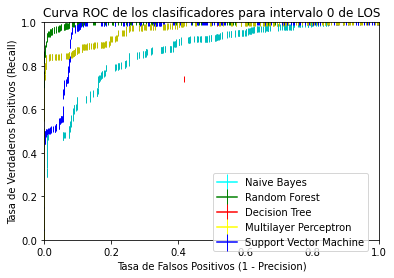

In [334]:
# Se calculan las tasas de falsos positivos, verdaderos positivos y los puntos para graficar 
# la curva para el intervalo 3
fpr_NB, tpr_NB, tresholds_NB = roc_curve(float_target, probs_interval, pos_label=float(n_interval))
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test_, y_proba_RF, pos_label=float(n_interval))
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test_, y_proba_DT, pos_label=float(n_interval))
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test_, y_proba_SVM, pos_label=float(n_interval))
fpr_MP, tpr_MP, thresholds_MP = roc_curve(y_test_, y_proba_MP, pos_label=float(n_interval))


# Gráfica ROC
cyan_line = mlines.Line2D([fpr_NB], [tpr_NB], color='cyan', marker='|',
                          markersize=17, label='Naive Bayes')
green_line = mlines.Line2D([fpr_RF], [tpr_RF], color='green', marker='|',
                          markersize=17, label='Random Forest')
red_line = mlines.Line2D([fpr_DT], [tpr_DT], color='red', marker='|',
                          markersize=17, label='Decision Tree')
blue_line = mlines.Line2D([fpr_SVM], [tpr_SVM], color='blue', marker='|',
                          markersize=17, label='Support Vector Machine')
yellow_line = mlines.Line2D([fpr_MP], [tpr_MP], color='yellow', marker='|',
                          markersize=17, label='Multilayer Perceptron')

plt.plot([fpr_NB], [tpr_NB], 'c|', [fpr_RF], [tpr_RF], 'g|', [fpr_DT], [tpr_DT], 'r|', [fpr_SVM], [tpr_SVM], 'b|', [fpr_MP], [tpr_MP], 'y|')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('Tasa de Falsos Positivos (1 - Precision)')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title(f'Curva ROC de los clasificadores para intervalo {n_interval} de LOS')
plt.legend(handles=[cyan_line, green_line, red_line, yellow_line, blue_line], bbox_to_anchor=(0.49, 0.33), loc=2)
plt.show()